In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [10]:
toyota = pd.read_csv('ToyotaCorolla.csv', encoding='windows-1252')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [11]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [12]:
toyota.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [14]:
toyota1 = pd.concat([toyota.iloc[:,2:4], toyota.iloc[:,6:7], toyota.iloc[:,8:9], toyota.iloc[:,12:14], toyota.iloc[:,15:18]], axis = 1)
toyota1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [15]:
toyota2 = toyota1.rename({'Age_08_04':'Age', 'cc':'CC', 'Quarterly_Tax':'QT', 'Weight':'WT'}, axis=1)
toyota2

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [16]:
toyota2[toyota2.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
113,24950,8,13253,116,2000,5,5,234,1320


In [17]:
toyota3 = toyota2.drop_duplicates().reset_index(drop=True)
toyota3

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [18]:
toyota3.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [19]:
toyota3.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
WT,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


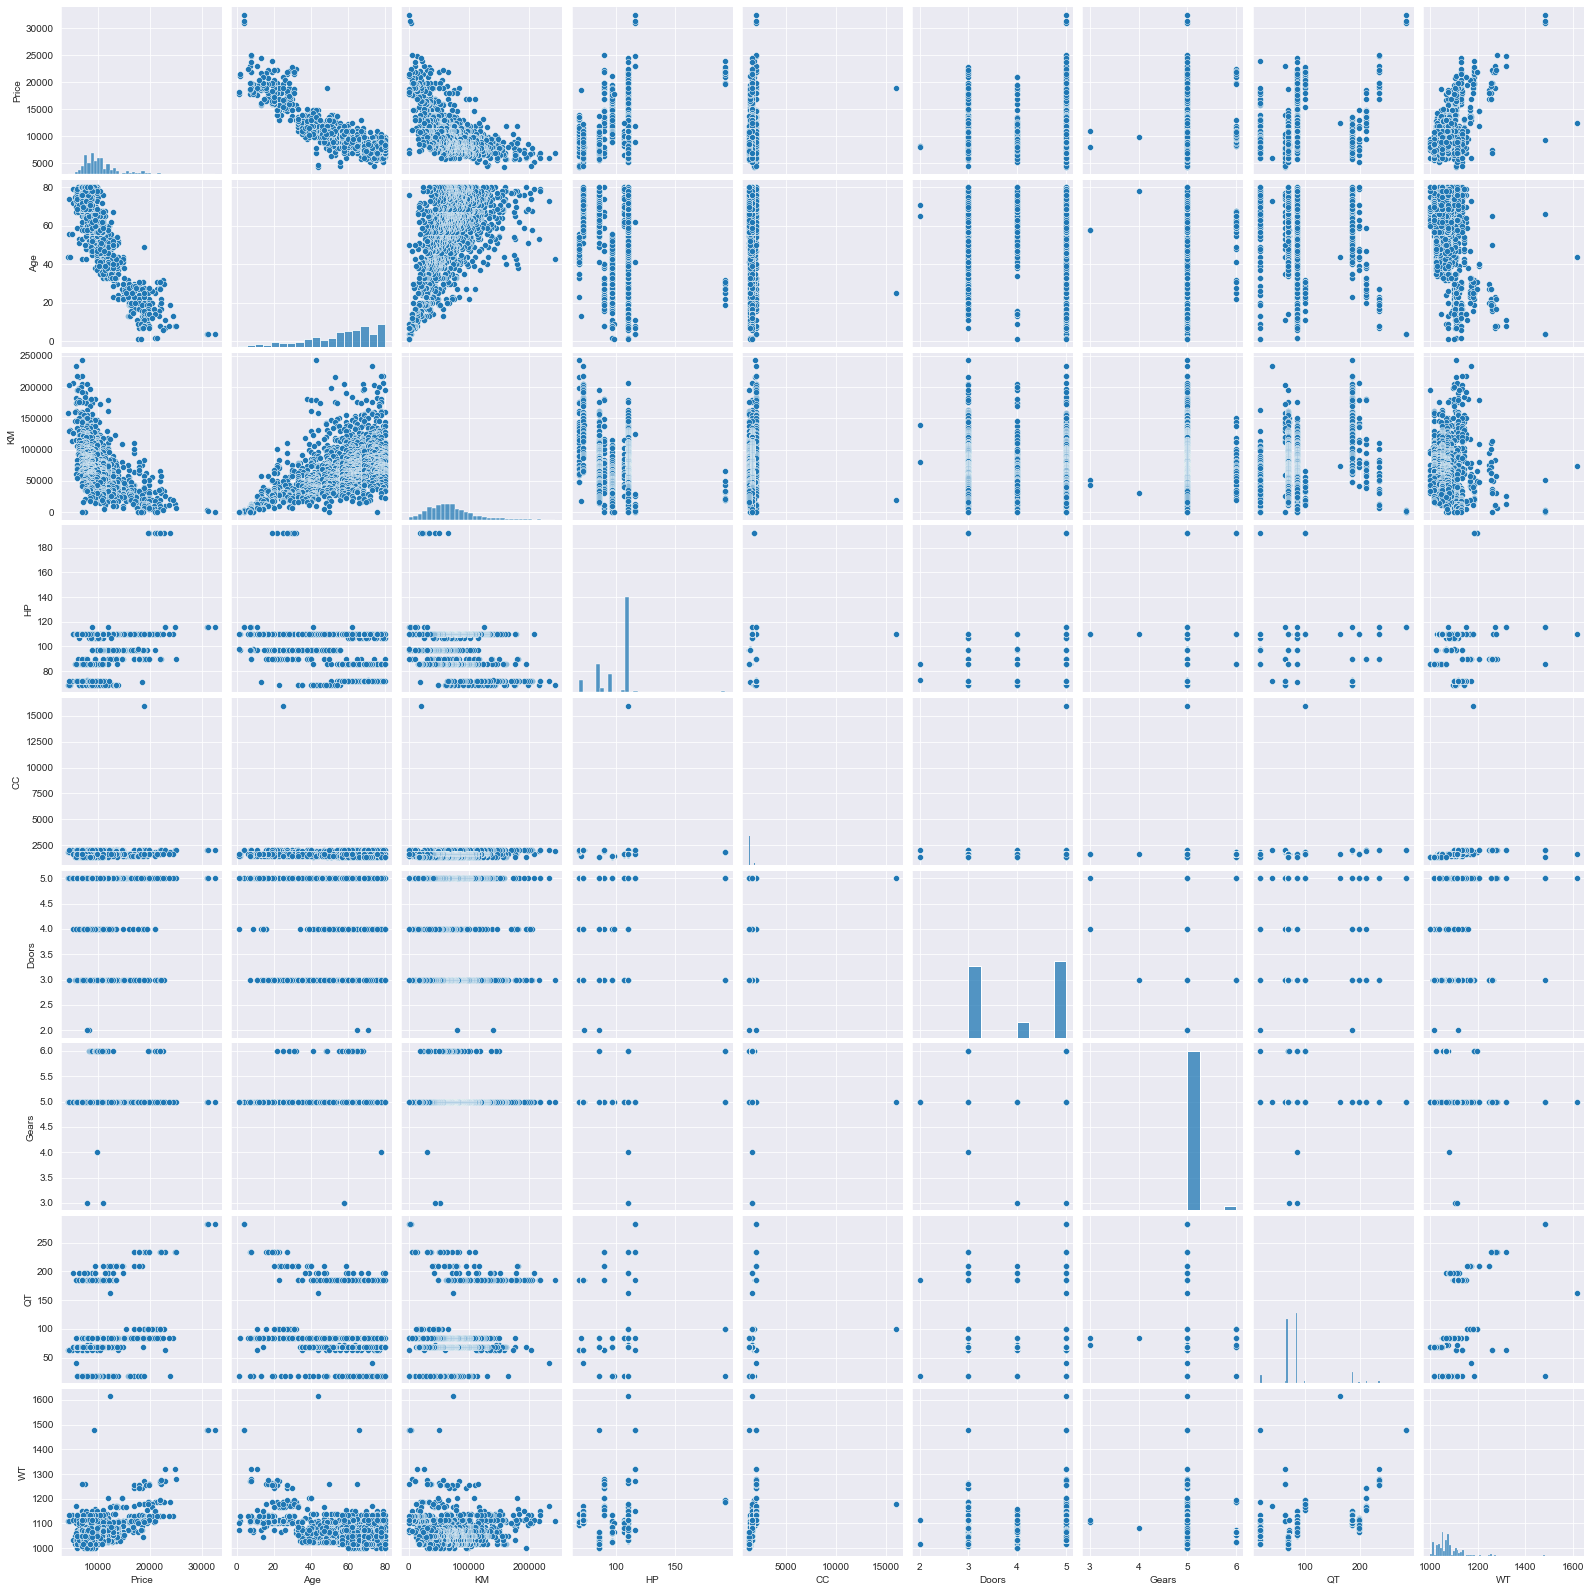

In [20]:
sns.set_style(style = 'darkgrid')
sns.pairplot(toyota3)

In [22]:
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT', data = toyota3).fit()

In [23]:
# Finding coefficient parameters

model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
WT             16.855470
dtype: float64

In [25]:
# Finding tvalues and pvalues

model.tvalues, np.round(model.pvalues, 5)

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 WT           15.760663
 dtype: float64,
 Intercept    0.00011
 Age          0.00000
 KM           0.00000
 HP           0.00000
 CC           0.18824
 Doors        0.98164
 Gears        0.00245
 QT           0.00329
 WT           0.00000
 dtype: float64)

In [26]:
# Finding rsquared values

model.rsquared , model.rsquared_adj 

(0.8625200256947, 0.8617487495415146)

In [ ]:
# Accuracy of model is 86.17 %

In [ ]:
# Build SLR and MLR models for insignificant variables 'Doors' and 'CC'
# Also find their tvalues and pvalues

In [27]:
# Doors has significant pvalue

ml_v=smf.ols('Price~Doors',data = toyota3).fit()  
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    19.421546
Doors         7.070520
dtype: float64 
 Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64


In [28]:
# CC has significant pvalue

ml_v=smf.ols('Price~CC',data = toyota3).fit()  
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    24.879592
CC            4.745039
dtype: float64 
 Intercept    7.236022e-114
CC            2.292856e-06
dtype: float64


In [29]:
# Doors and CC have significant pvalue

ml_v=smf.ols('Price~Doors+CC',data = toyota3).fit()  
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    12.786341
Doors         6.752236
CC            4.268006
dtype: float64 
 Intercept    1.580945e-35
Doors        2.109558e-11
CC           2.101878e-05
dtype: float64


In [ ]:
# Calculating VIF for all independent variables

In [35]:
rsq_age = smf.ols('Age~KM+HP+CC+Doors+Gears+QT+WT',data = toyota3).fit().rsquared
vif_age = 1/(1-rsq_age)

In [36]:
rsq_KM = smf.ols('KM~Age+HP+CC+Doors+Gears+QT+WT',data = toyota3).fit().rsquared
vif_KM = 1/(1-rsq_KM)

In [37]:
rsq_HP = smf.ols('HP~Age+KM+CC+Doors+Gears+QT+WT',data = toyota3).fit().rsquared
vif_HP = 1/(1-rsq_HP)

In [38]:
rsq_CC = smf.ols('CC~Age+KM+HP+Doors+Gears+QT+WT',data = toyota3).fit().rsquared
vif_CC = 1/(1-rsq_CC)

In [39]:
rsq_Doors = smf.ols('Doors~Age+KM+HP+CC+Gears+QT+WT',data = toyota3).fit().rsquared
vif_Doors = 1/(1-rsq_DR)

In [41]:
rsq_Gears = smf.ols('Gears~Age+KM+HP+CC+Doors+QT+WT',data = toyota3).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

In [42]:
rsq_QT = smf.ols('QT~Age+KM+HP+CC+Doors+Gears+WT',data = toyota3).fit().rsquared
vif_QT = 1/(1-rsq_QT)

In [43]:
rsq_WT = smf.ols('WT~Age+KM+HP+CC+Doors+Gears+QT',data = toyota3).fit().rsquared
vif_WT = 1/(1-rsq_WT)

In [45]:
# Putting values in dataframe format

d1 = {'Variables':['Age','KM','HP','CC','Doors','Gears','QT','WT'], 'Vif':[vif_age, vif_KM, vif_HP, vif_CC, vif_Doors, vif_Gears, vif_QT, vif_WT]}
Vif_df = pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,WT,2.487180


In [ ]:
# No variable has VIF > 20 hence no collinearity, so consider all varaibles in Regression equation

In [48]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

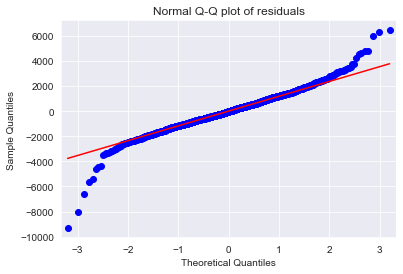

In [49]:
# Test for normality of residuals using residual model

qqplot = sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
# Outlier detection

In [50]:
list(np.where(model.resid > 6000))

[array([109, 146, 522], dtype=int64)]

In [51]:
list(np.where(model.resid < 6000))

[array([   0,    1,    2, ..., 1432, 1433, 1434], dtype=int64)]

In [52]:
# Test for Homoscedasticity or Heteroscedasticity

def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

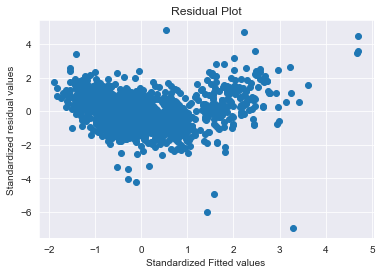

In [53]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [ ]:
# Test for Errors or Residuals Vs Regressors or Independent 'x' variables or Predictors 

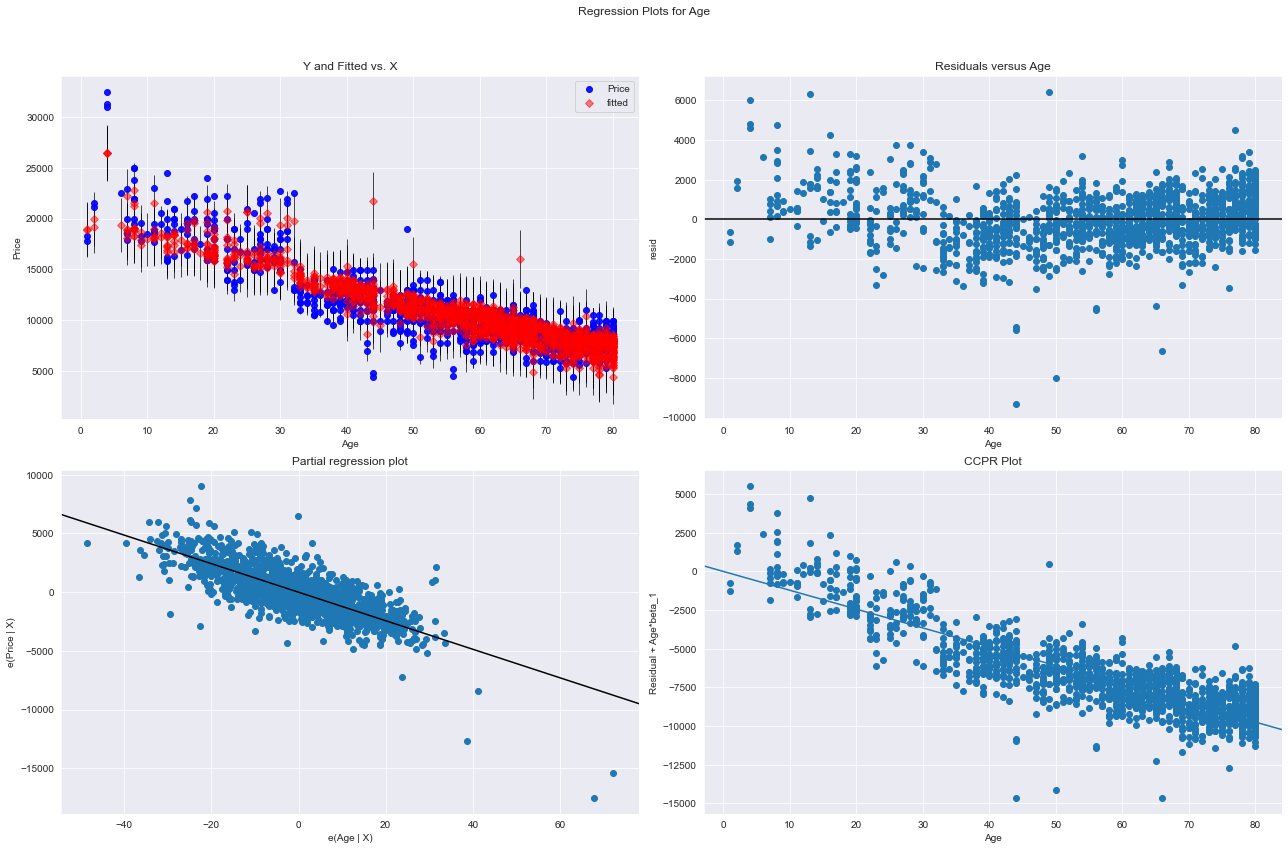

In [56]:
fig = plt.figure(figsize = (18,12))
sm.graphics.plot_regress_exog(model, 'Age', fig = fig)
plt.show()

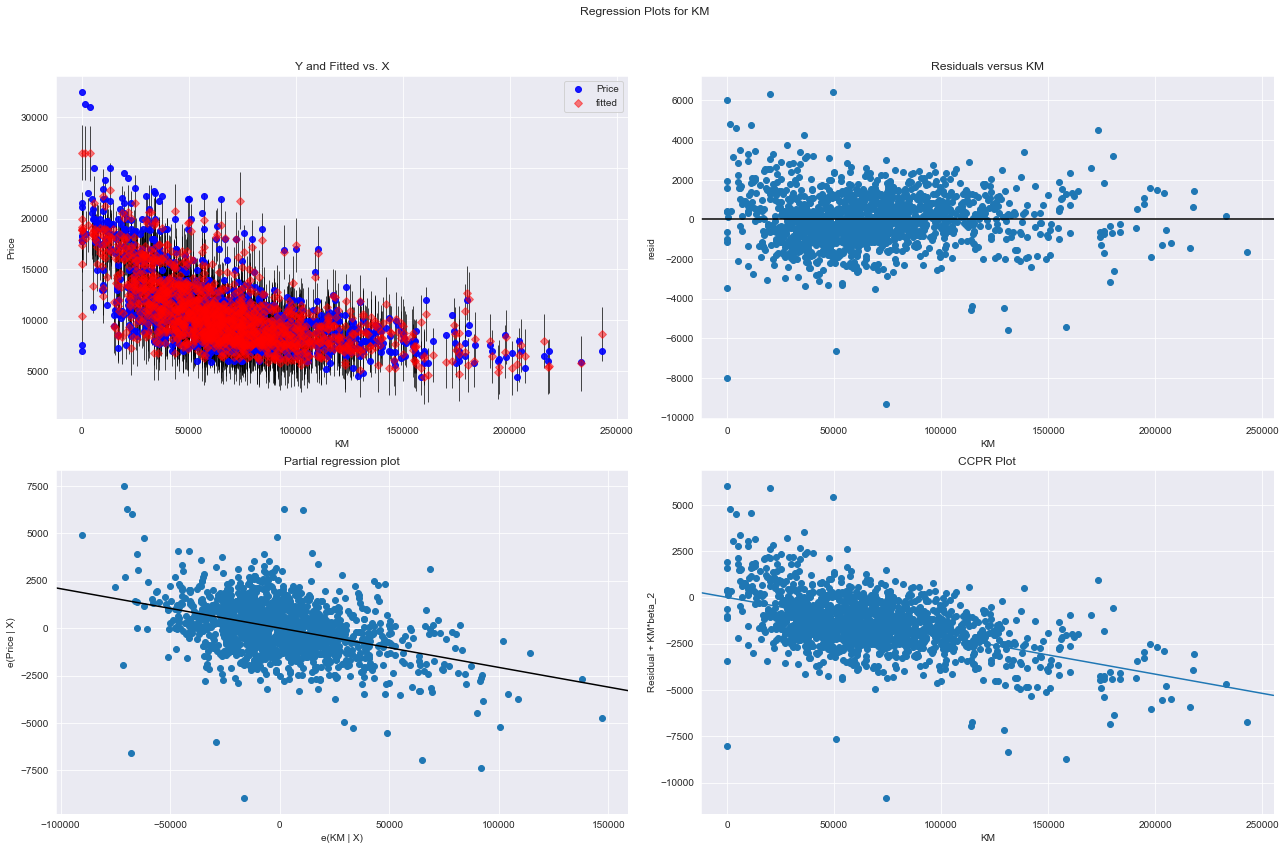

In [57]:
fig = plt.figure(figsize = (18,12))
sm.graphics.plot_regress_exog(model, 'KM', fig = fig)
plt.show()

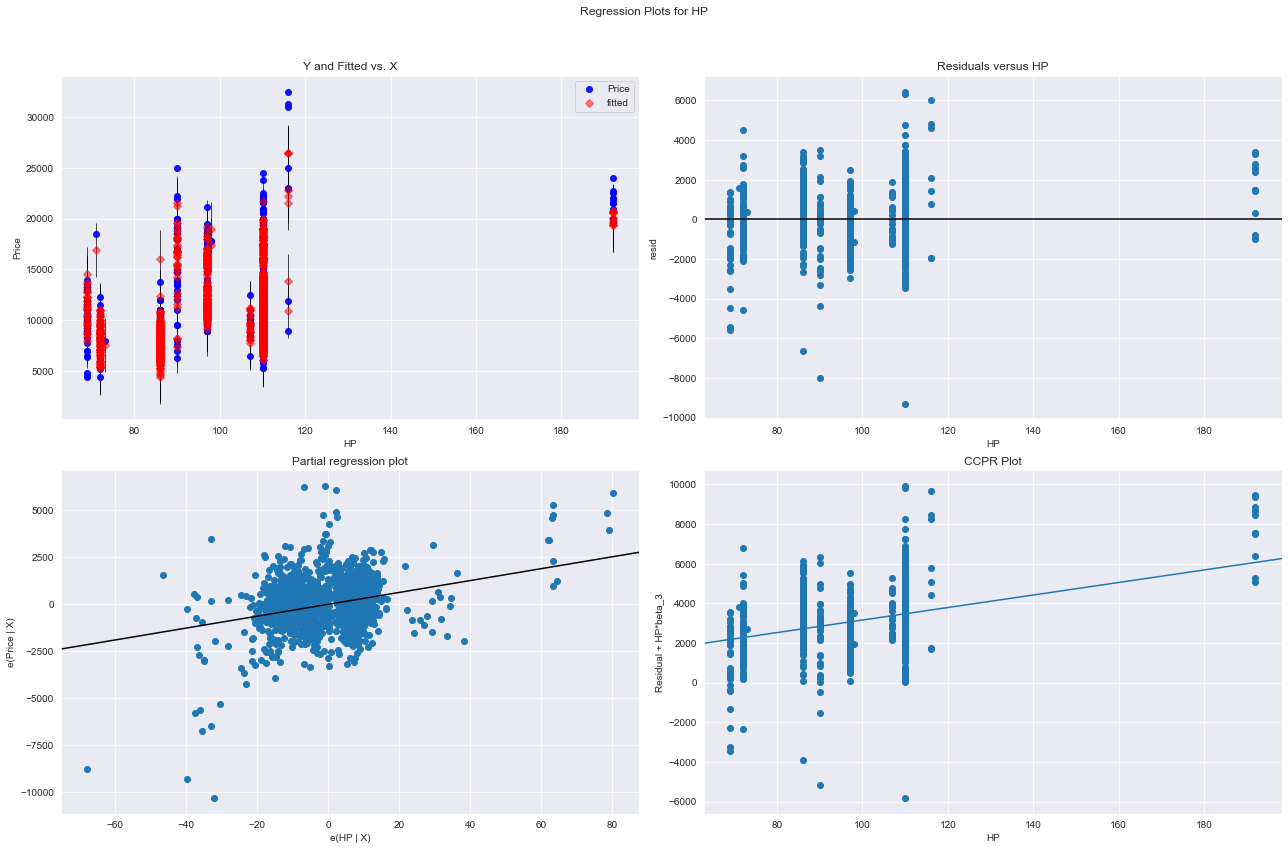

In [58]:
fig = plt.figure(figsiz e= (18,12))
sm.graphics.plot_regress_exog(model, 'HP', fig = fig)
plt.show()

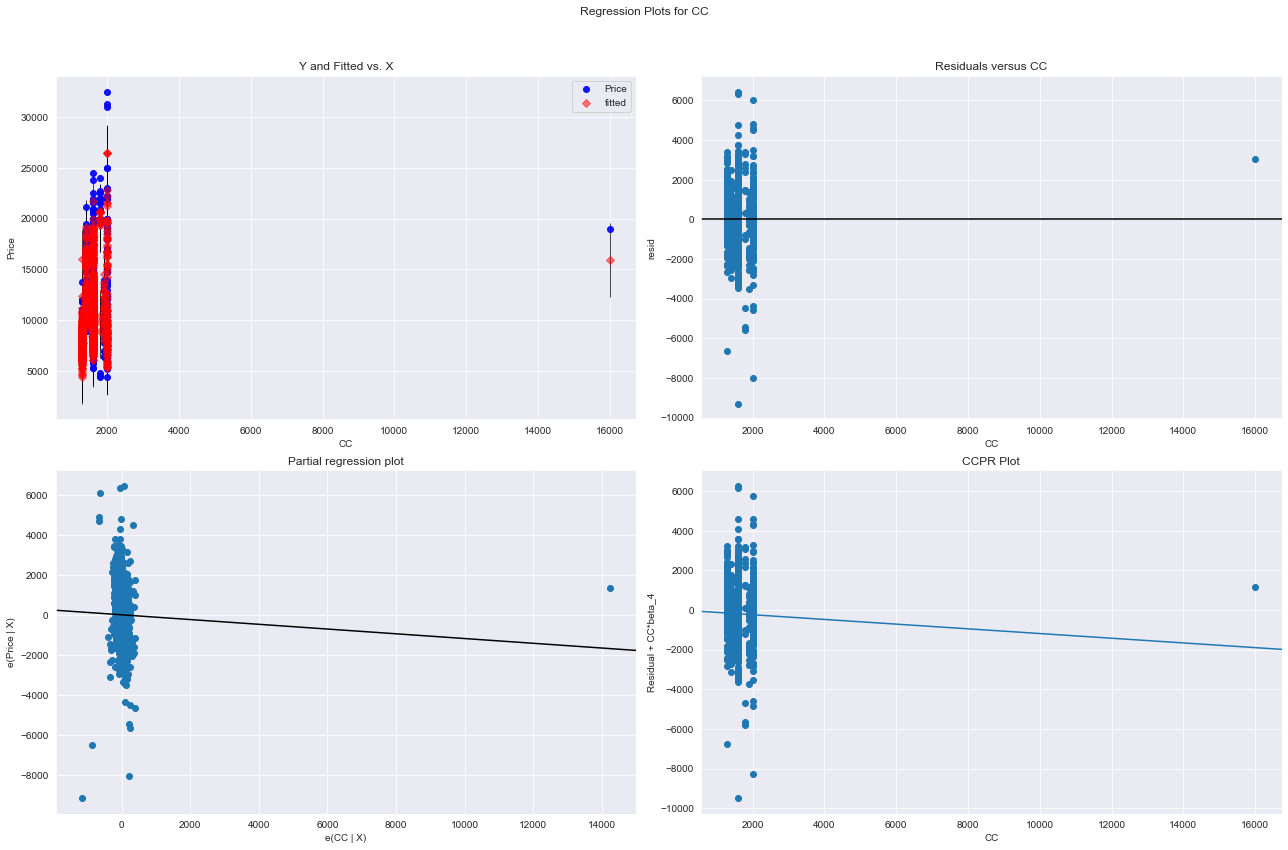

In [59]:
fig = plt.figure(figsize = (18,12))
sm.graphics.plot_regress_exog(model, 'CC', fig = fig)
plt.show()

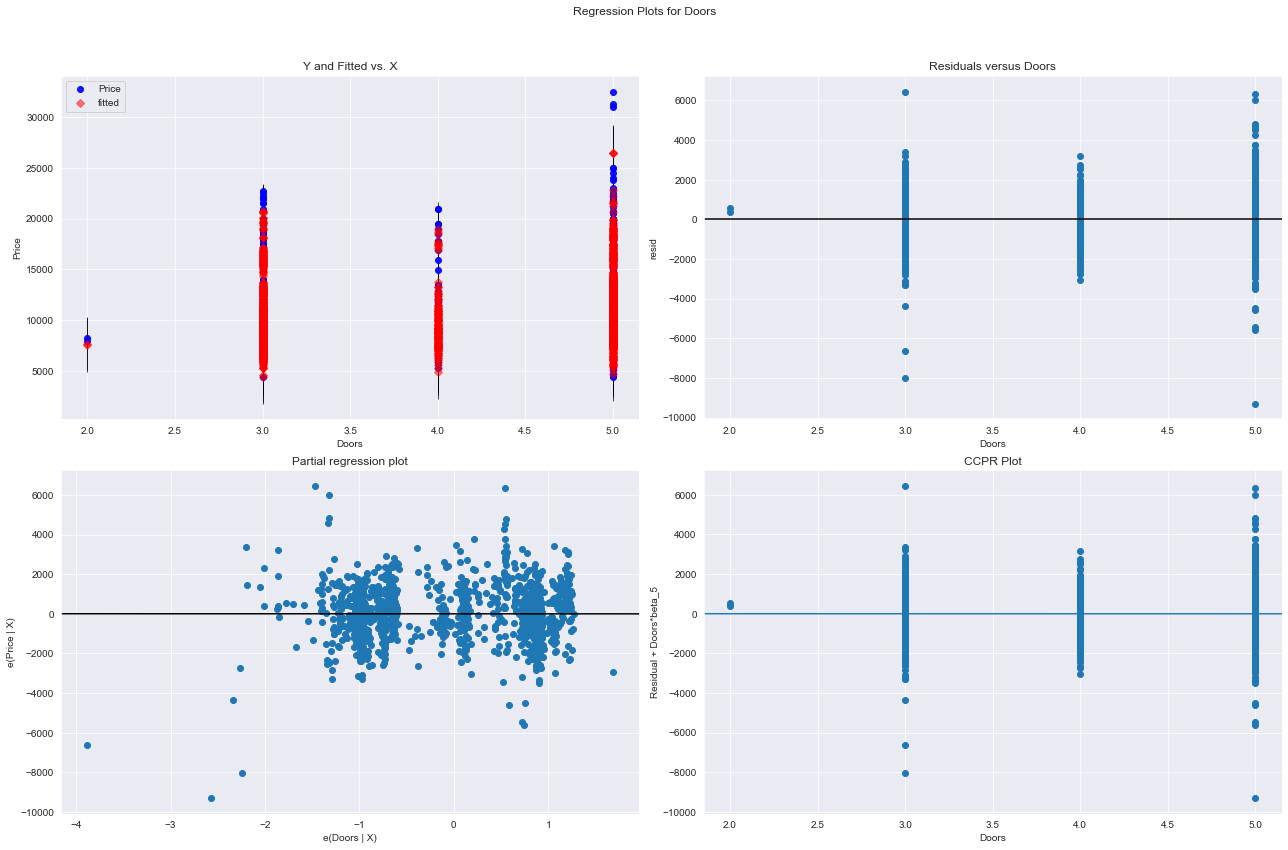

In [60]:
fig = plt.figure(figsize = (18,12))
sm.graphics.plot_regress_exog(model, 'Doors', fig = fig)
plt.show()

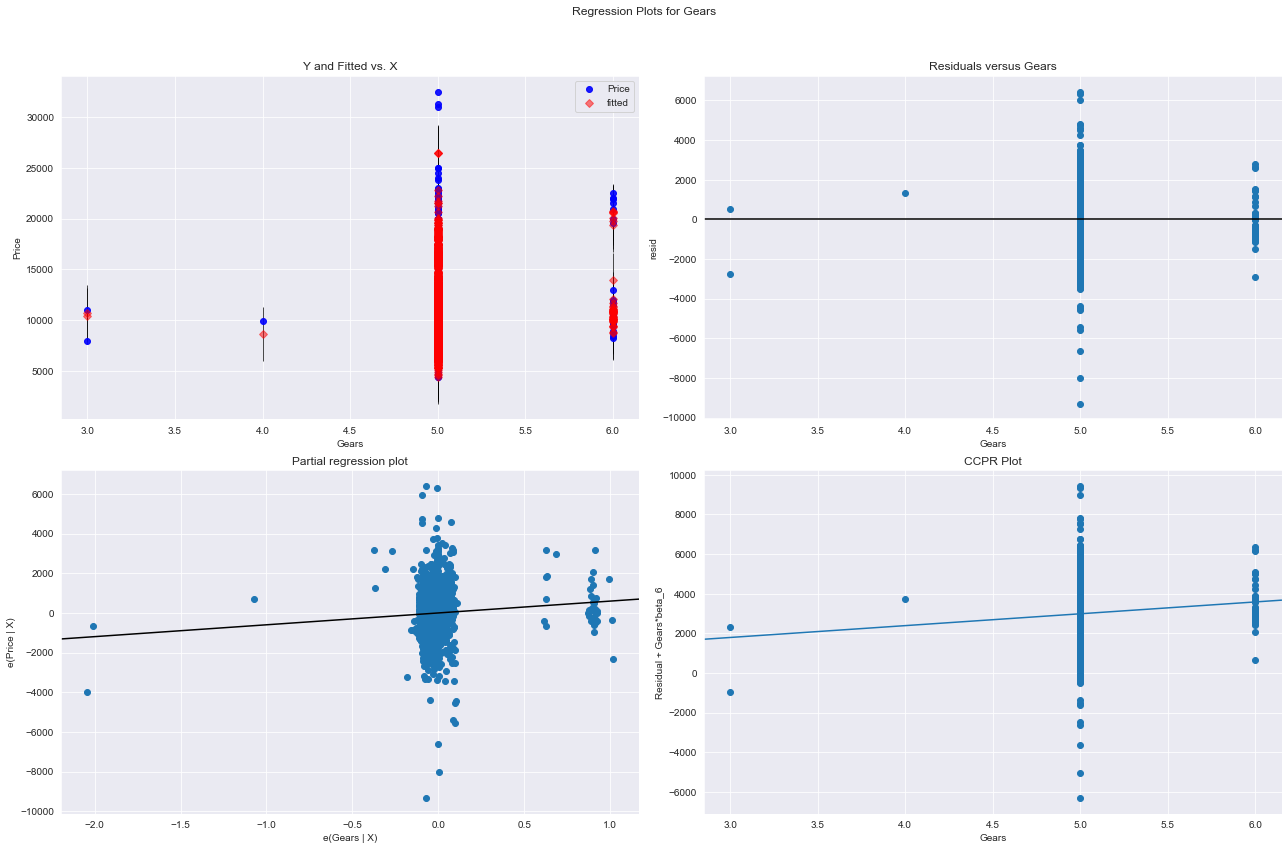

In [62]:
fig = plt.figure(figsize = (18,12))
sm.graphics.plot_regress_exog(model, 'Gears', fig = fig)
plt.show()

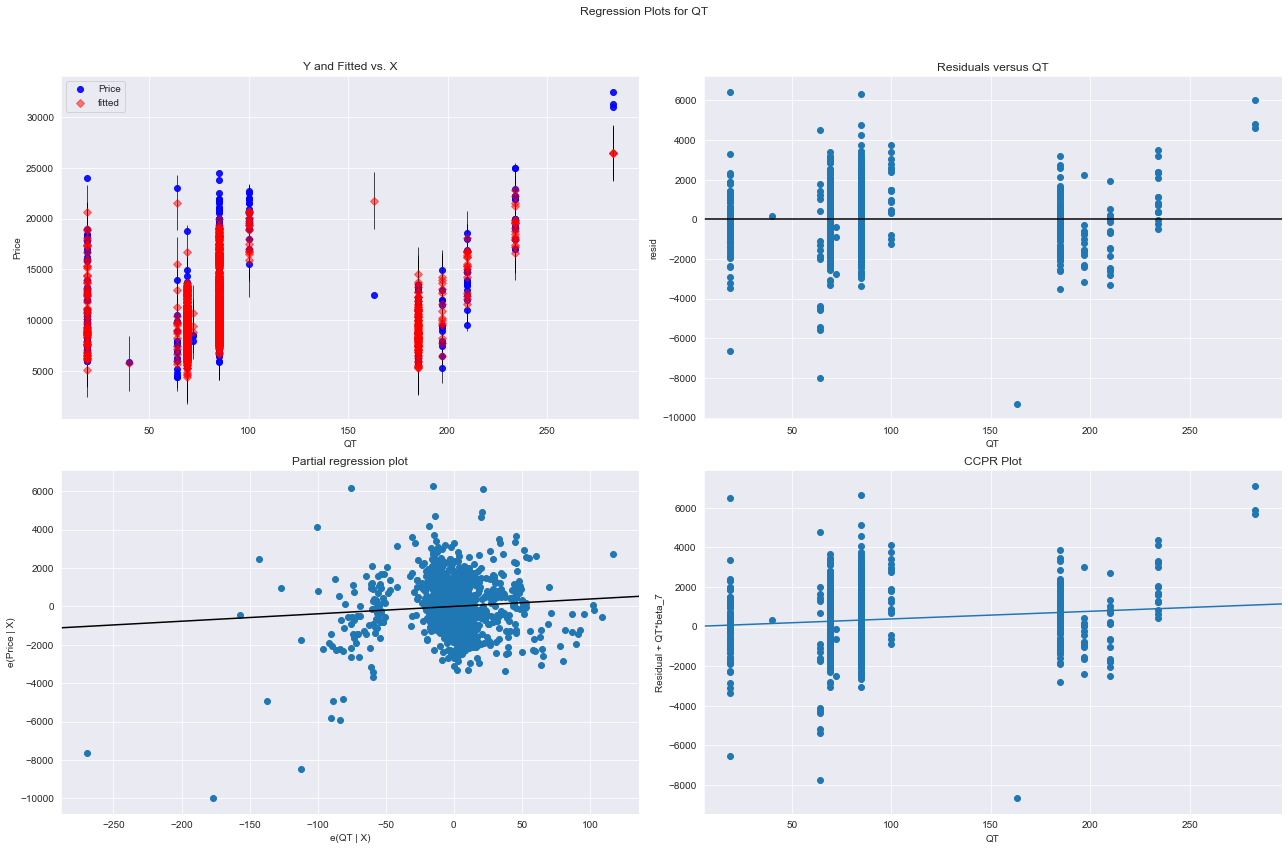

In [63]:
fig = plt.figure(figsize = (18,12))
sm.graphics.plot_regress_exog(model, 'QT', fig = fig)
plt.show()

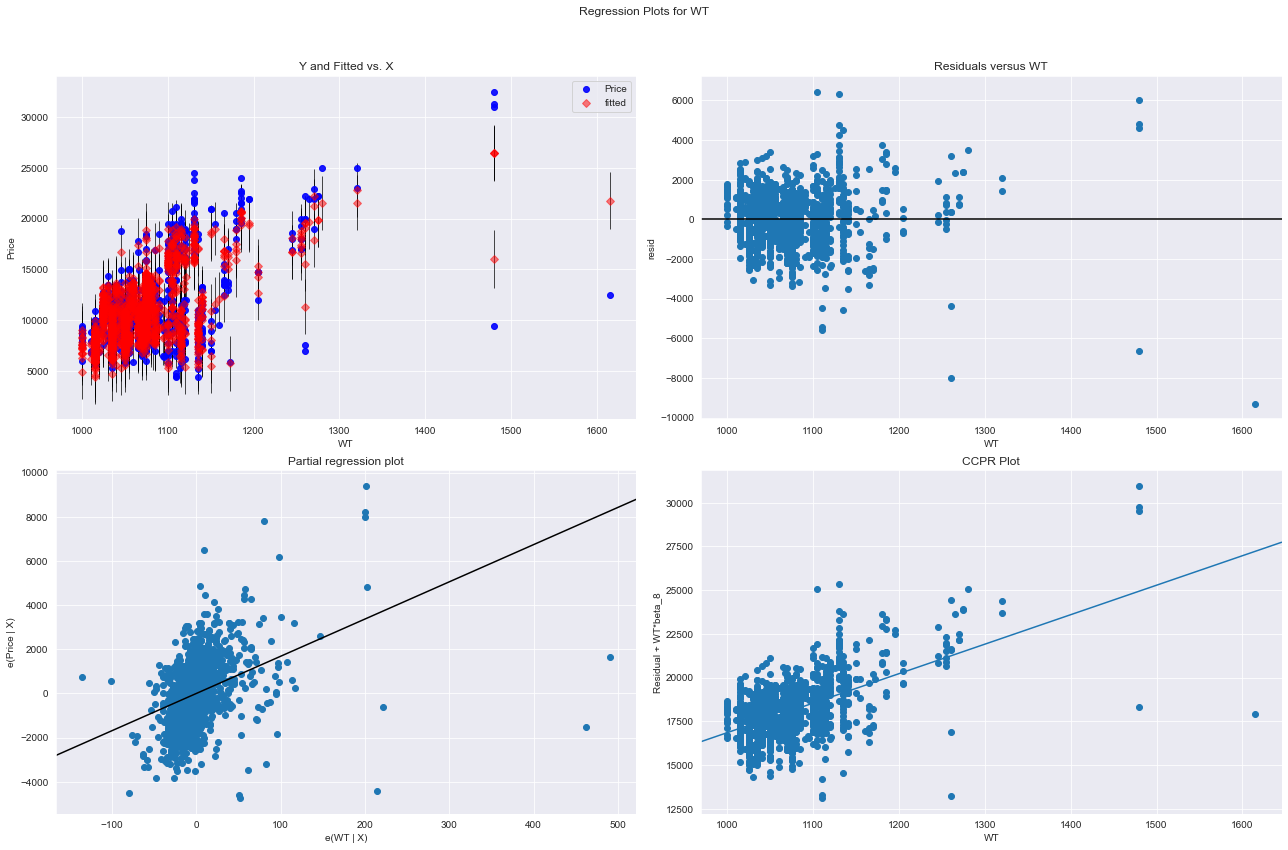

In [64]:
fig = plt.figure(figsize = (18,12))
sm.graphics.plot_regress_exog(model, 'WT', fig = fig)
plt.show()

In [65]:
# Get influencers using Cook's Distance
# If Cook's Distance > 1 then it's an outlier

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

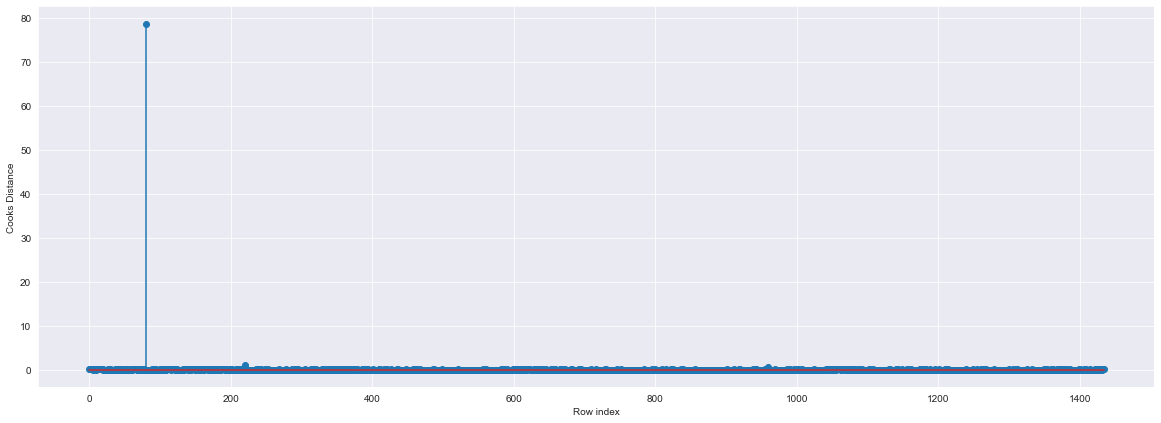

In [67]:
# Plot the influencers values using stem plot

fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [68]:
# Index and value of influencer where c is more than .5

(np.argmax(c),np.max(c))

(80, 78.72950582248232)

In [69]:
from statsmodels.graphics.regressionplots import influence_plot

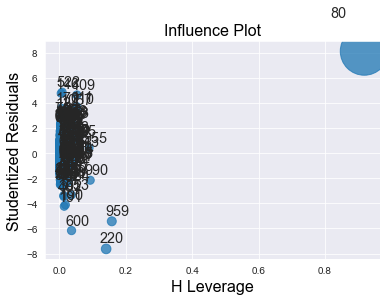

In [70]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers

influence_plot(model)
plt.show()

In [71]:
k = toyota3.shape[1]
n = toyota3.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [72]:
toyota3[toyota3.index.isin([80])] 

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
80,18950,25,20019,110,16000,5,5,100,1180


In [76]:
# Improving the model
#Load the data

toyota_new = toyota3.copy()
toyota_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [77]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))

toyota4 = toyota_new.drop(toyota_new.index[[80]],axis = 0).reset_index(drop = True)
toyota4

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [89]:
 while np.max(c)>0.5 :
    model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT', data = toyota4).fit()
    (c,_) = model.get_influence().cooks_distance
    c
    np.argmax(c) ,np.max(c)
    toyota4 = toyota4.drop(toyota4.index[[np.argmax(c)]],axis = 0).reset_index(drop = True)
    toyota4
else:
    final_model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT', data = toyota4).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [90]:
final_model.rsquared

0.8882395145171204

In [91]:
toyota4

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


In [94]:
# Considering new data for prediction

new_data = pd.DataFrame({'Age':22, "KM":50000, "HP":75, "CC":1600, "Doors":3, "Gears":5, "QT":19, "WT":1015},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,WT
0,22,50000,75,1600,3,5,19,1015


In [95]:
# Manual Price Prediction

final_model.predict(new_data)

0    11843.671392
dtype: float64

In [96]:
# Price Prediction 

final_model.predict(toyota4)

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64